[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [4]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201213200853.csv", 
                     encoding="cp949")
df_raw.shape

(450, 30)

In [5]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

중남미           45
합계            45
중국            45
유럽연합(EU)      45
일본            45
기타            45
아세안(ASEAN)    45
미국            45
중동            45
대양주           45
Name: 국가(대륙)별, dtype: int64

In [6]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,40207,37631,48978,40918,44861,55386,53848,48277,64225,53052
46,미국,합계,면세점,-,-,-,-,-,-,-,...,3603,2317,2079,2657,2951,1818,1481,698,339,81
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,36604,35314,46899,38261,41910,53568,52367,47579,63886,52971
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1553,1784,1774,1298,1408,1653,1382,1182,1630,1923
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,1,0,0,0,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [7]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4',
       '2020 3/4 p)'],
      dtype='object')

In [9]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="백만원")
df.shape

(12150, 5)

In [10]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  12150 non-null  object
 1   상품군별     12150 non-null  object
 2   판매유형별    12150 non-null  object
 3   기간       12150 non-null  object
 4   백만원      12150 non-null  object
dtypes: object(5)
memory usage: 474.7+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [22]:
int("2020 3/4 p".split()[0])

2020

In [23]:
df["연도"] = df["기간"].map(lambda x: x.split()[0])
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [24]:
int("2020 3/4 p)".split()[1].split("/")[0])

3

In [25]:
#기간에서 분기만 분리하기
df["분기"] = df["기간"].map(lambda x: int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [26]:
df["분기"] = df["기간"].apply(lambda  x : x.split()[1].split("/")[0])
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [27]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df.head()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  12150 non-null  object 
 1   상품군별     12150 non-null  object 
 2   판매유형별    12150 non-null  object 
 3   기간       12150 non-null  object 
 4   백만원      8550 non-null   float64
 5   연도       12150 non-null  int32  
 6   분기       12150 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 569.7+ KB


In [30]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") &  (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10206 entries, 48 to 12149
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10206 non-null  object 
 1   상품군별     10206 non-null  object 
 2   판매유형별    10206 non-null  object 
 3   기간       10206 non-null  object 
 4   백만원      7182 non-null   float64
 5   연도       10206 non-null  int32  
 6   분기       10206 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 558.1+ KB


In [31]:
#결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [32]:
#판매유형별 데이터는 일부 기간엔 "계"만 존재하기 때문에 
#판매유형멸 == "계" 데이터만 가져와서 봐야지
#평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다.
df_total = df[df["판매유형별"]=="계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

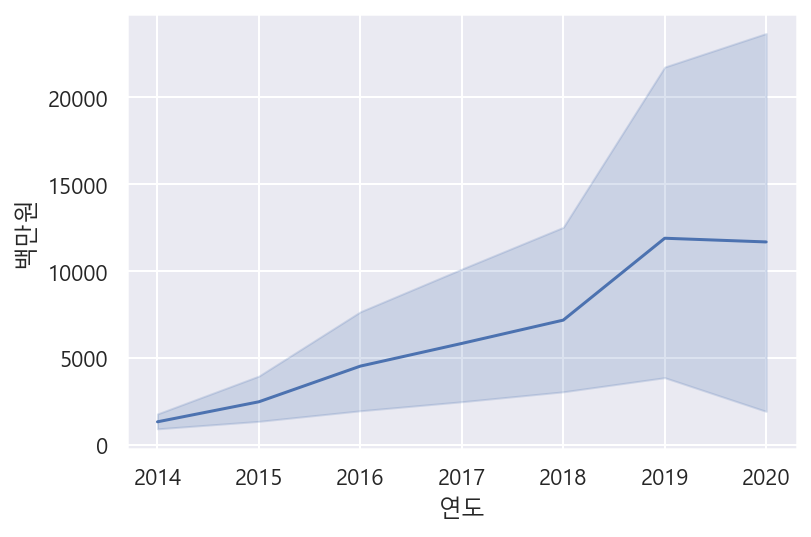

In [34]:
#연도, 판매액 lineplot으로 그리기

sns.lineplot( data=df_total,x="연도", y="백만원")

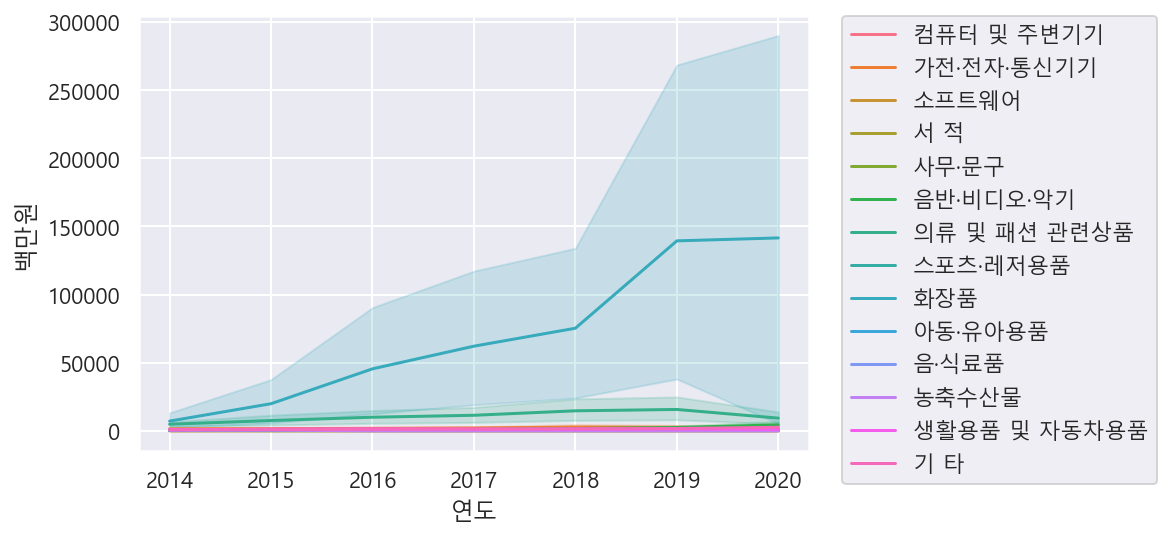

In [35]:
#연도, 판매액 limeplot으로 그리고 상품군별로 다른 색생으로 표시하기
sns.lineplot( data=df_total,x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

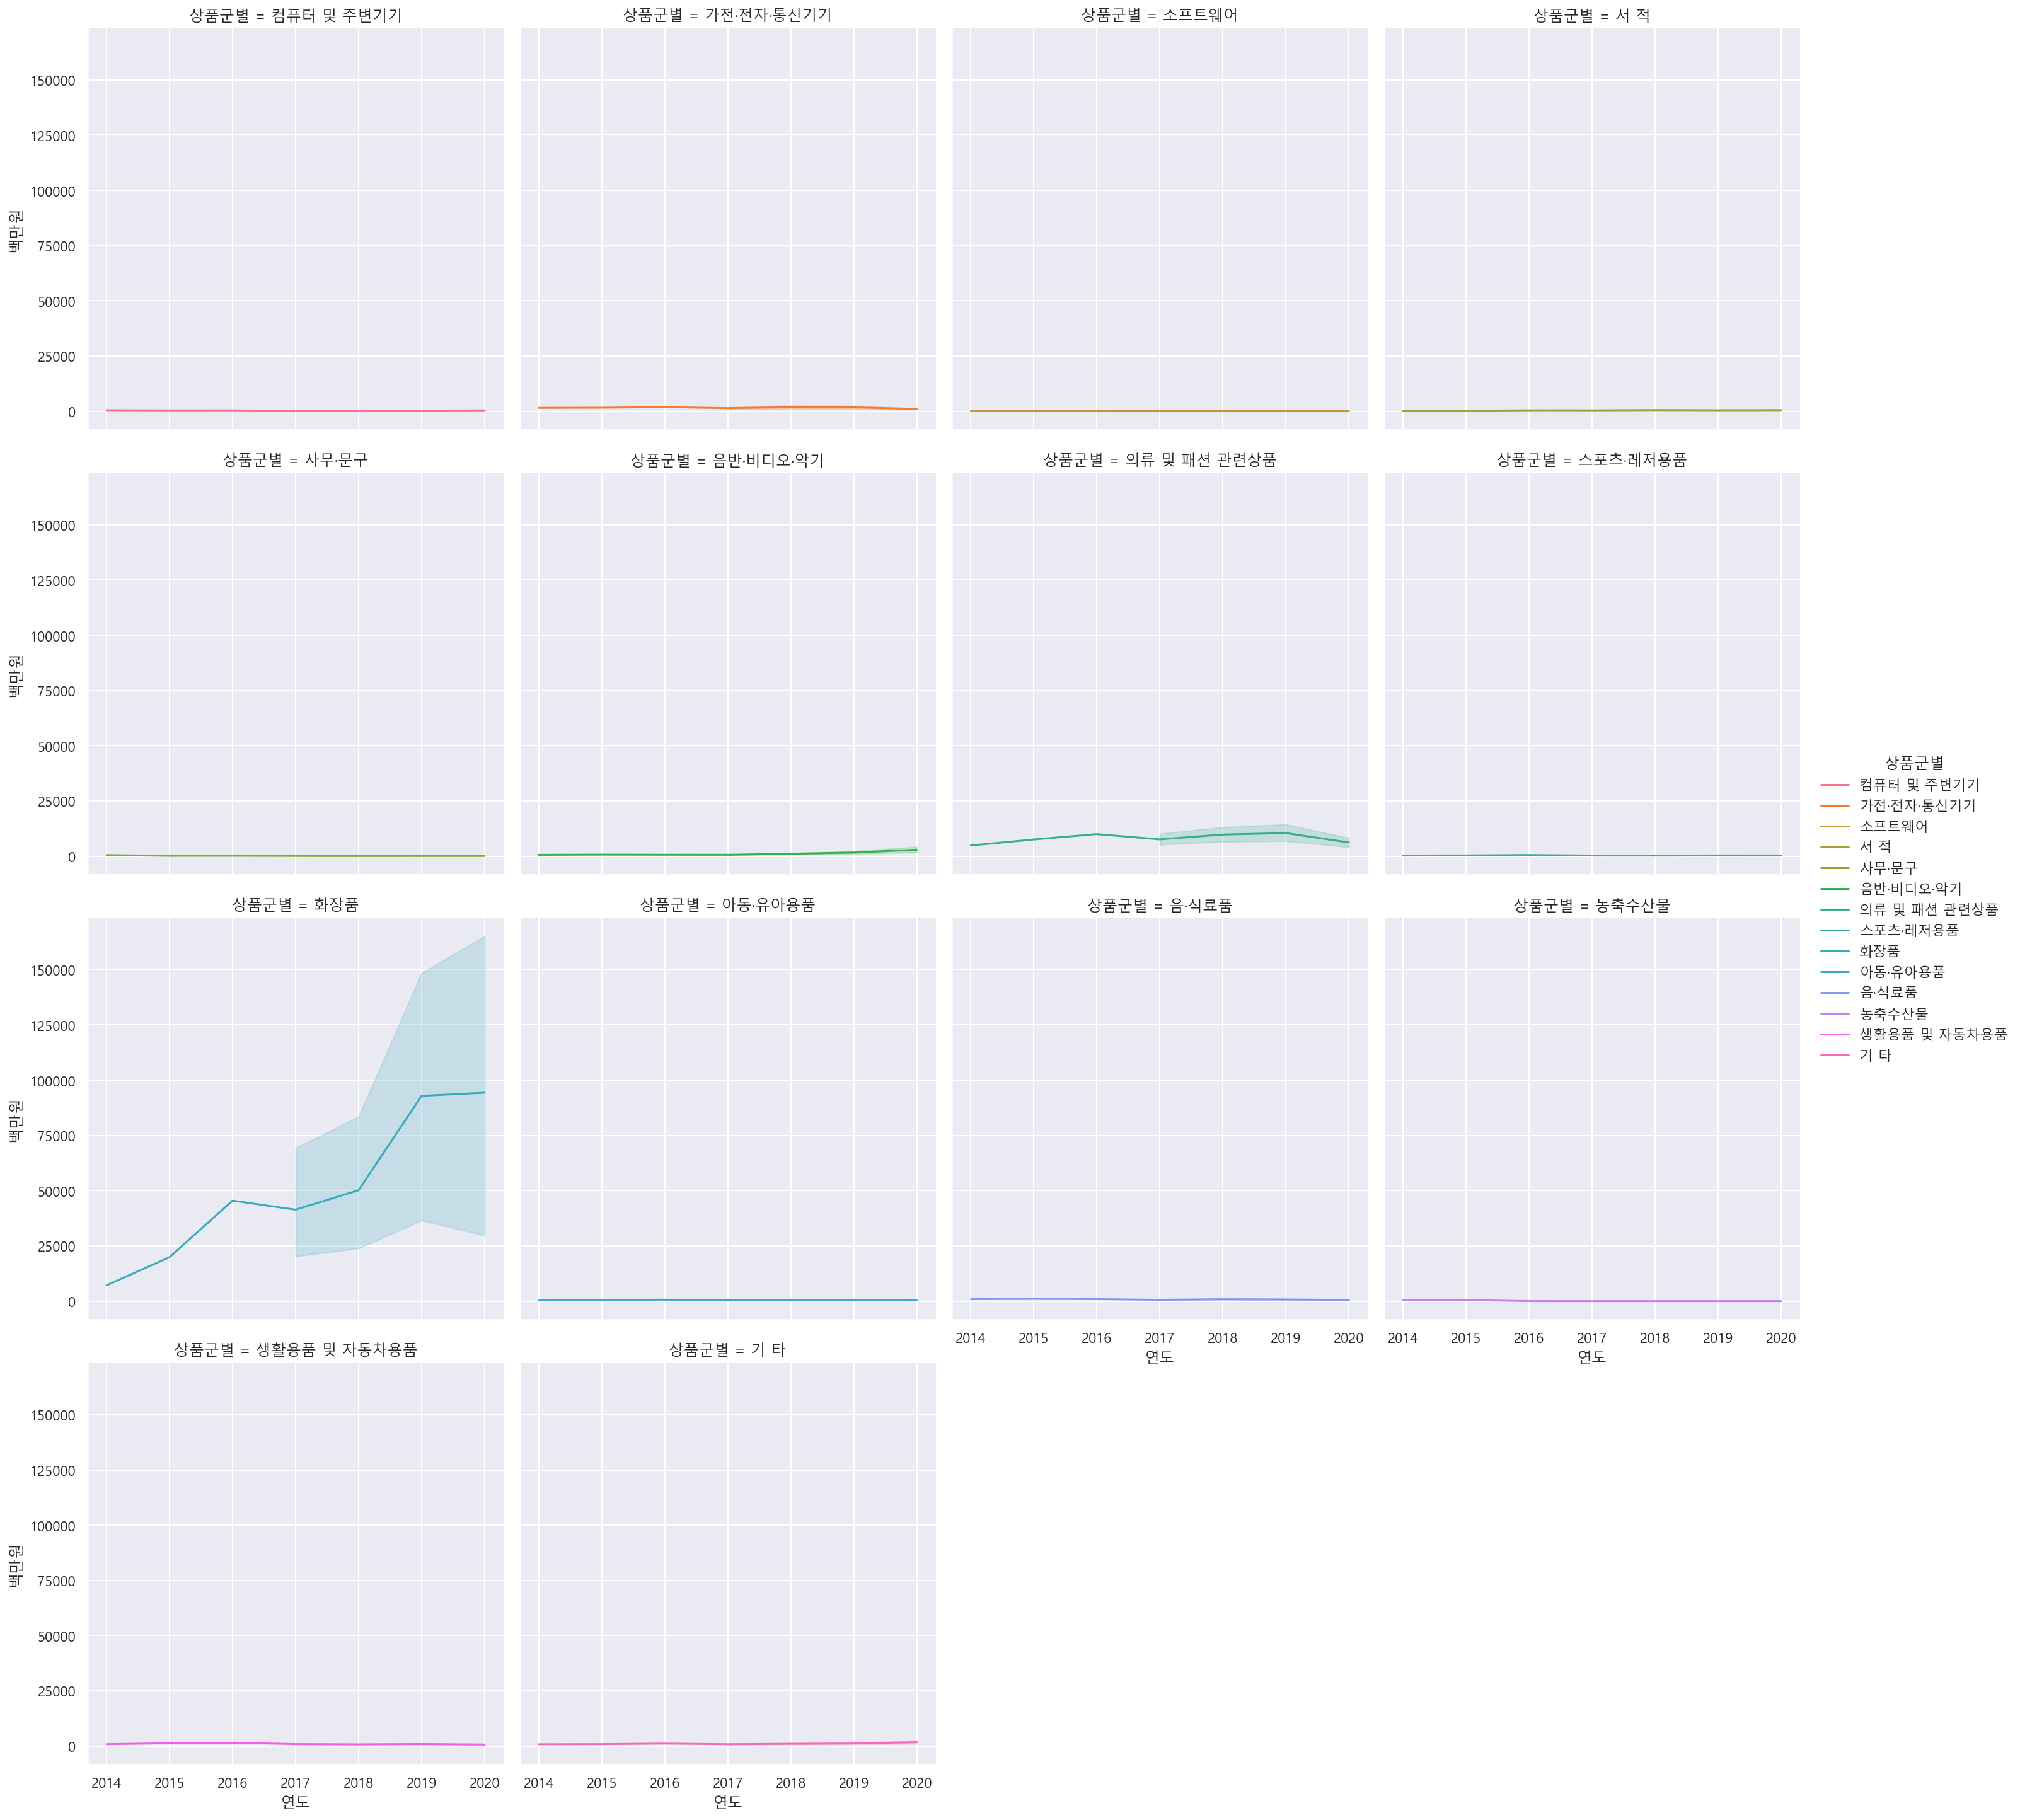

In [37]:
#위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기

sns.relplot(x="연도", y="백만원", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [42]:
#isin을 사용해 화장품만 제외를 하고 df_sub이라는 변수에 담습니다.
df_sub =  df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션 관련상품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
12135,기타,아동·유아용품,계,2020 3/4 p),624.0,2020,3
12138,기타,음·식료품,계,2020 3/4 p),49.0,2020,3
12141,기타,농축수산물,계,2020 3/4 p),1.0,2020,3
12144,기타,생활용품 및 자동차용품,계,2020 3/4 p),353.0,2020,3


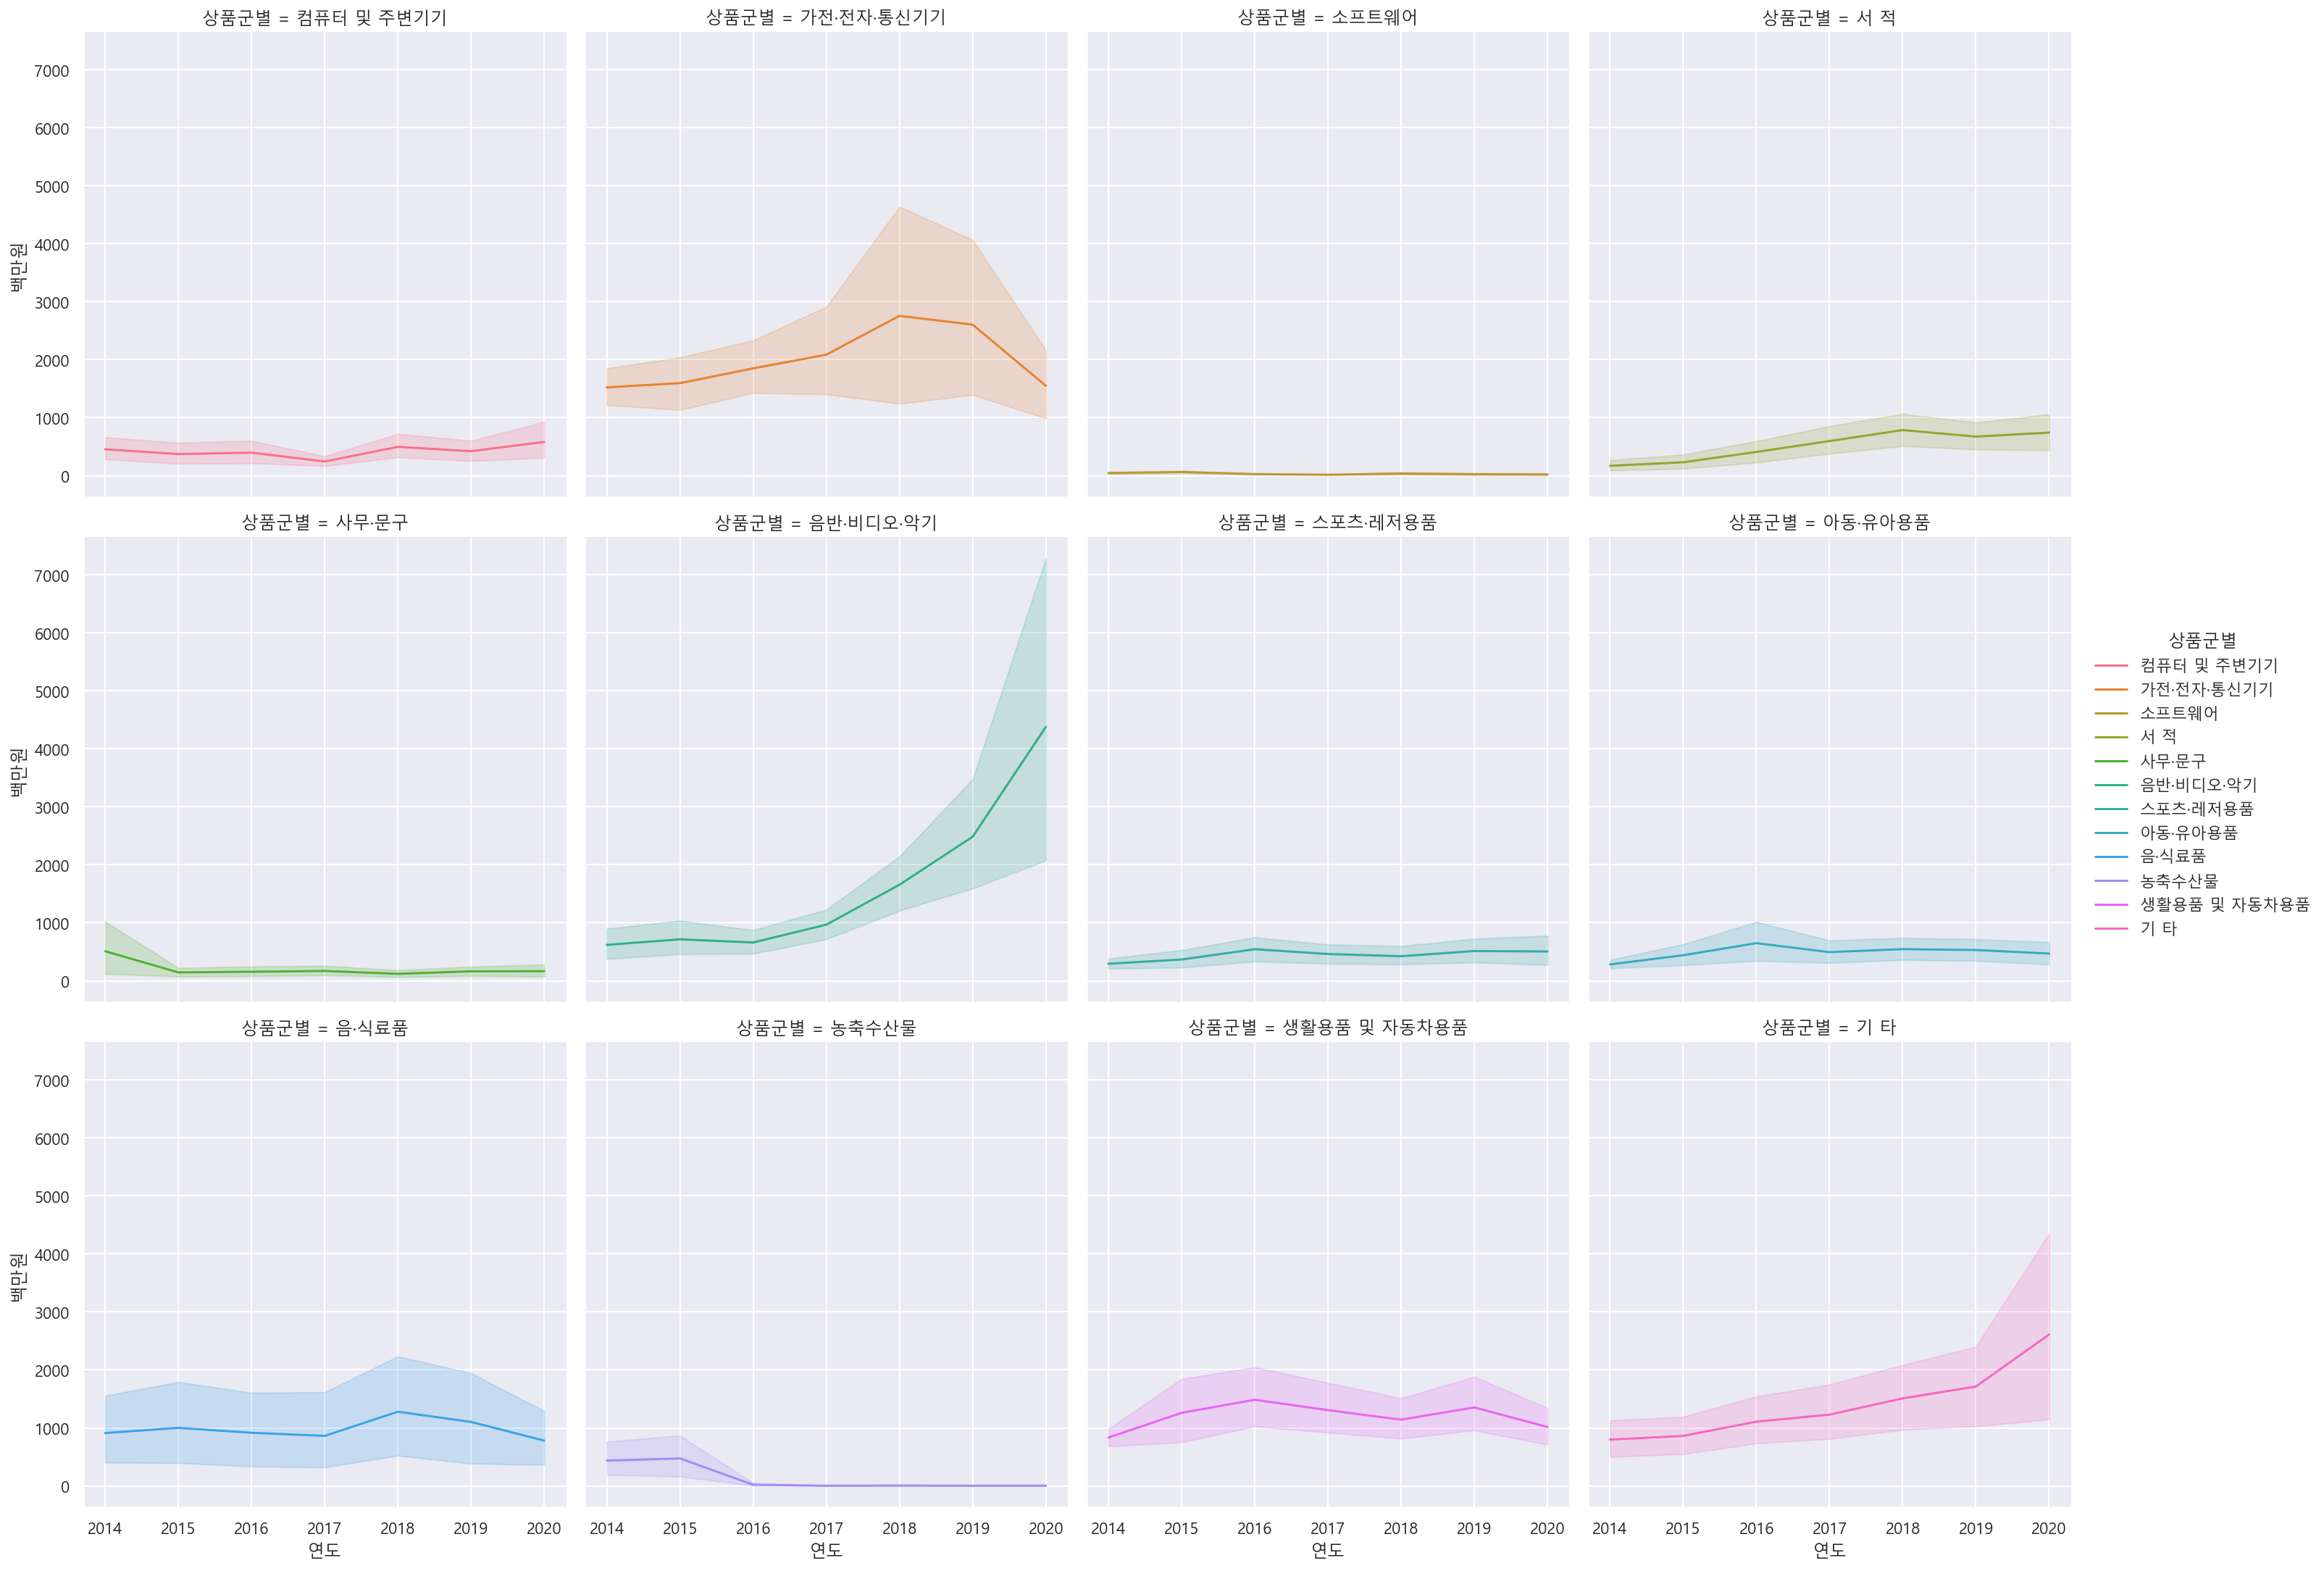

In [43]:
#연도별 판매액으 상품군별로 relpot을 활용해 서브플롯으로 그려보기
sns.relplot(x="연도", y="백만원", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

In [45]:
#df_cosmetic이라는 변수에 상품군별이 화장품인 데이터마 가져오기


df_cosmetic = df_total[(df_total["상품군별"] == "화장품")].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

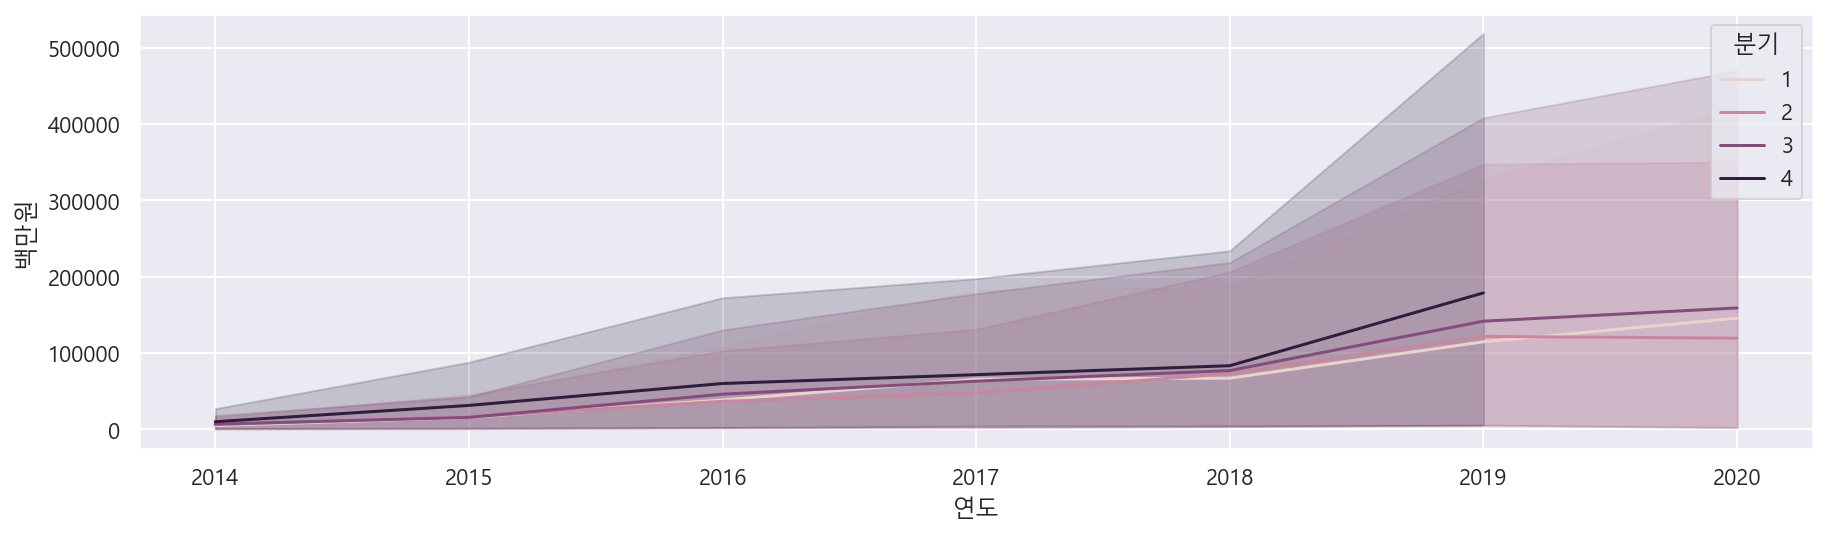

In [47]:
#연도와 판매액으로 lineplot으로 그리고 분기별로 다른 색상으로 표현해 보기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic,x="연도",y="백만원",hue="분기")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

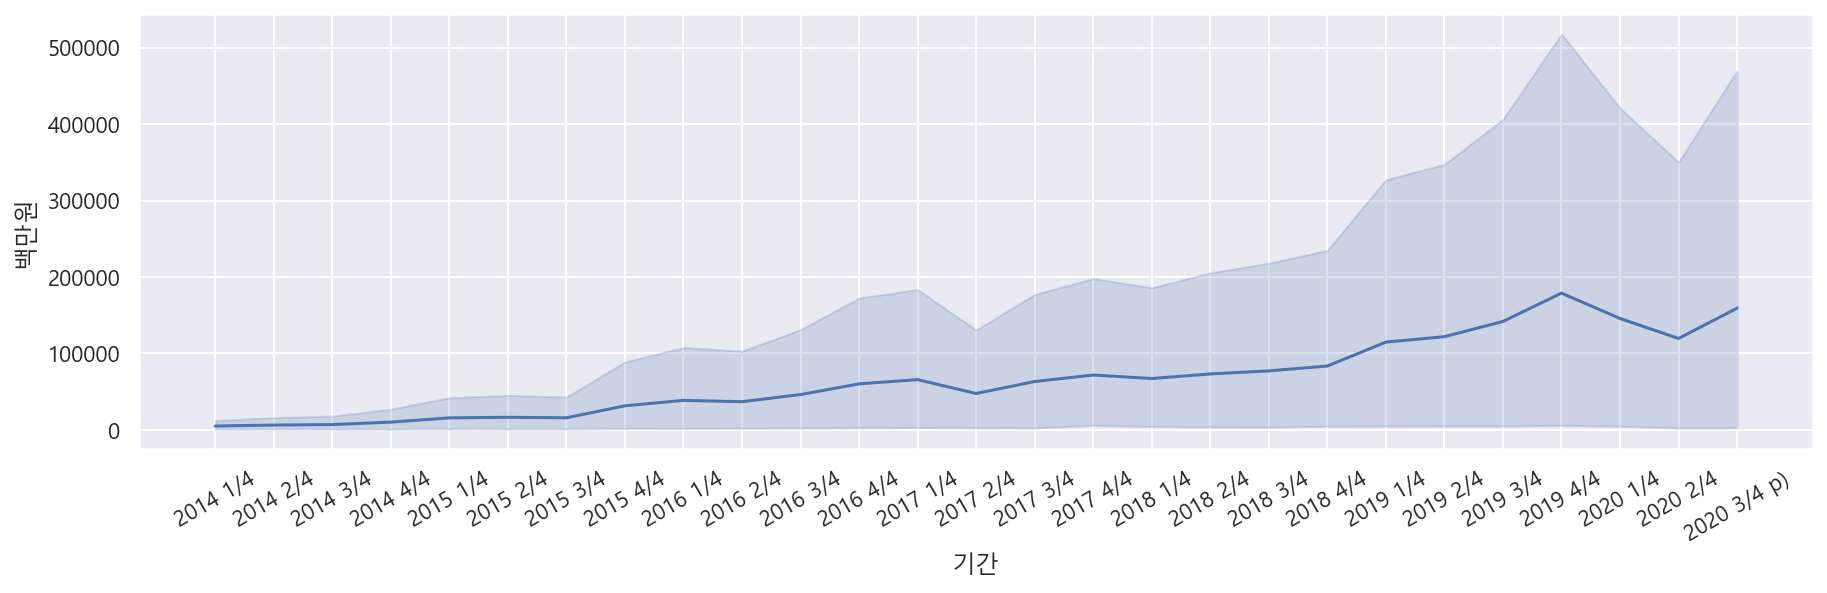

In [48]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

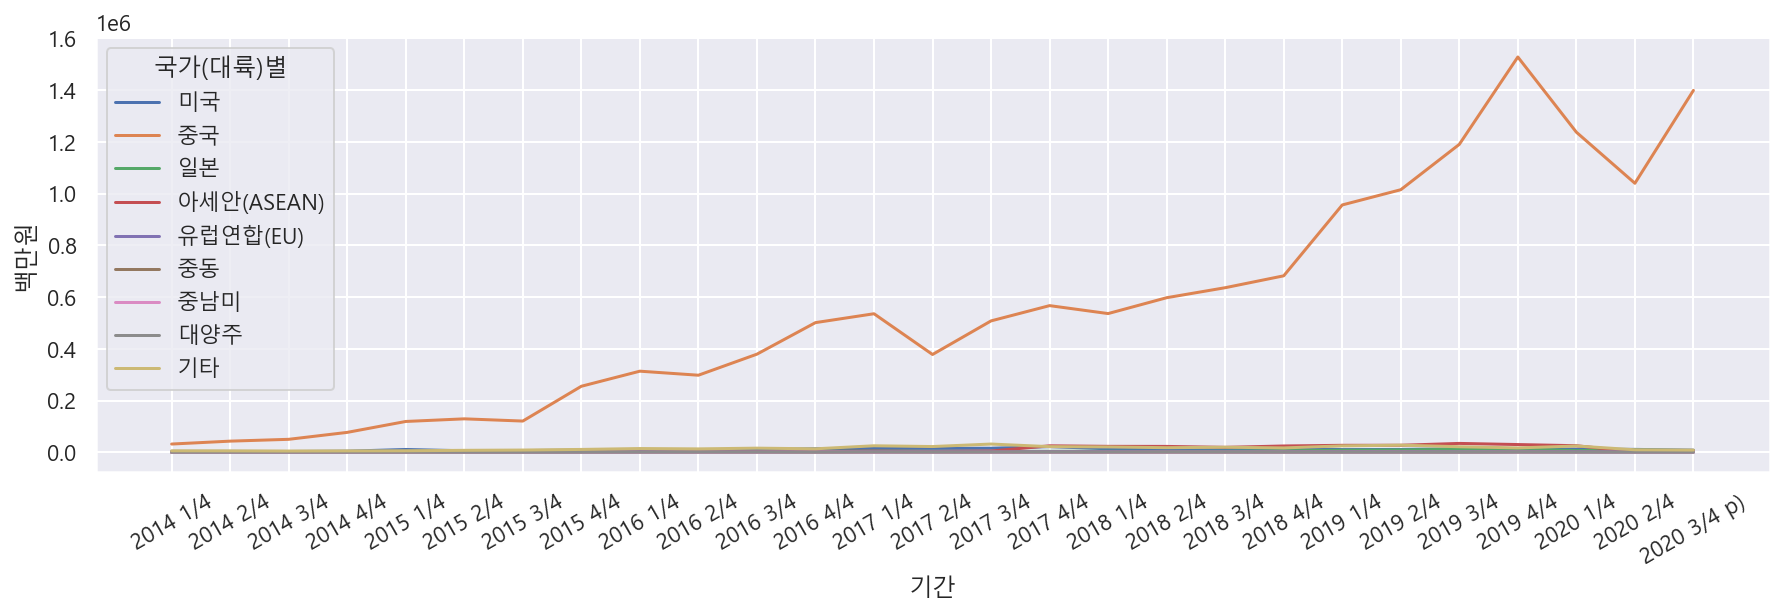

In [51]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

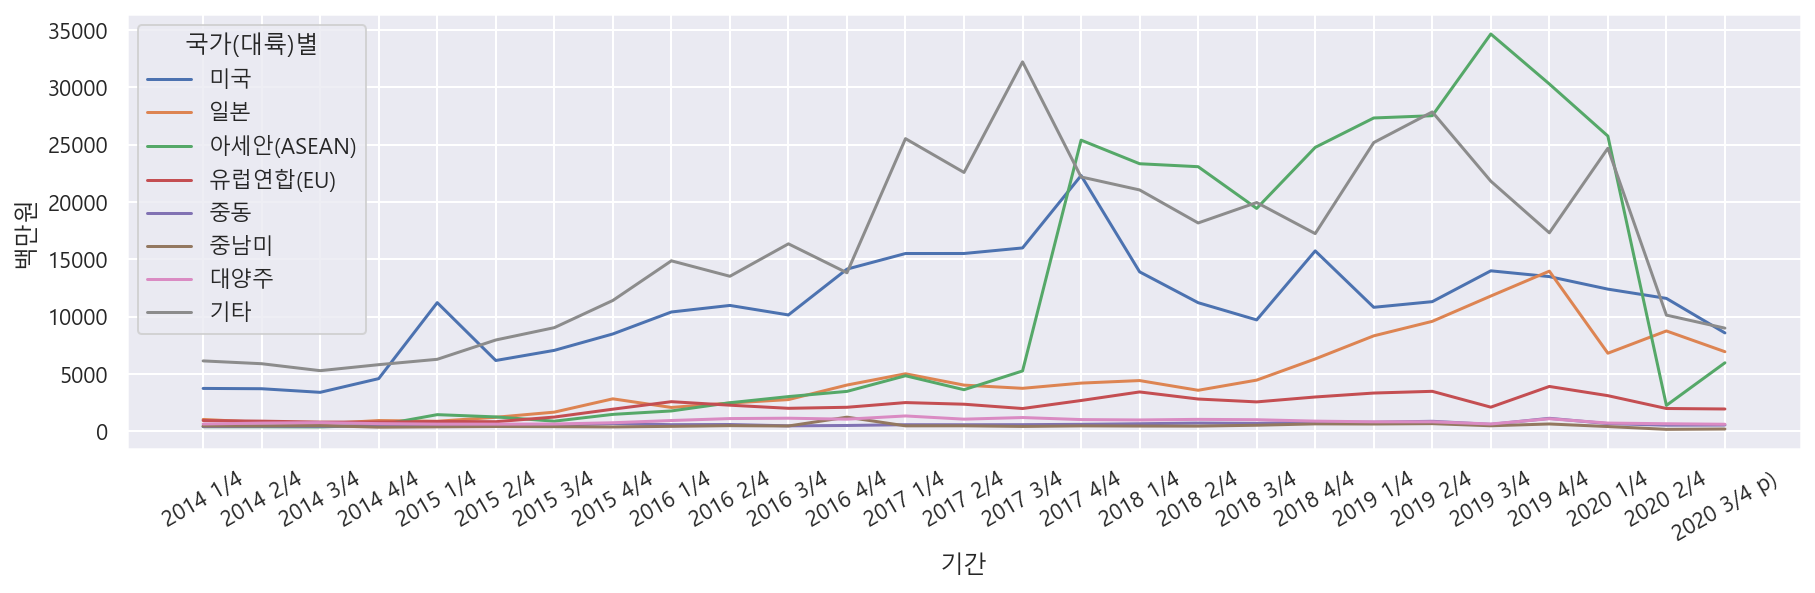

In [50]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

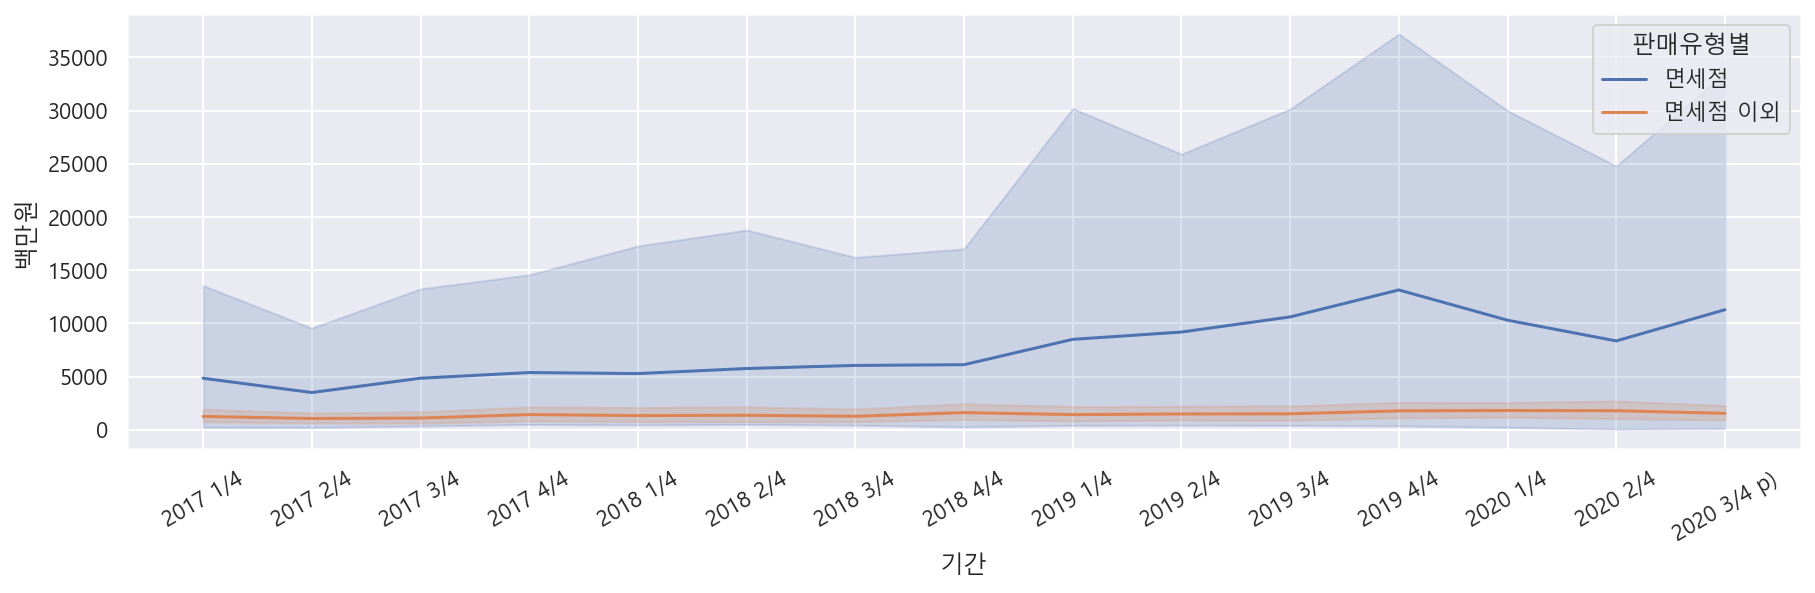

In [54]:
#화장품 판매약에 대한 기간별 금액 데이터 시각화하과"판매유형별"로 다른색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

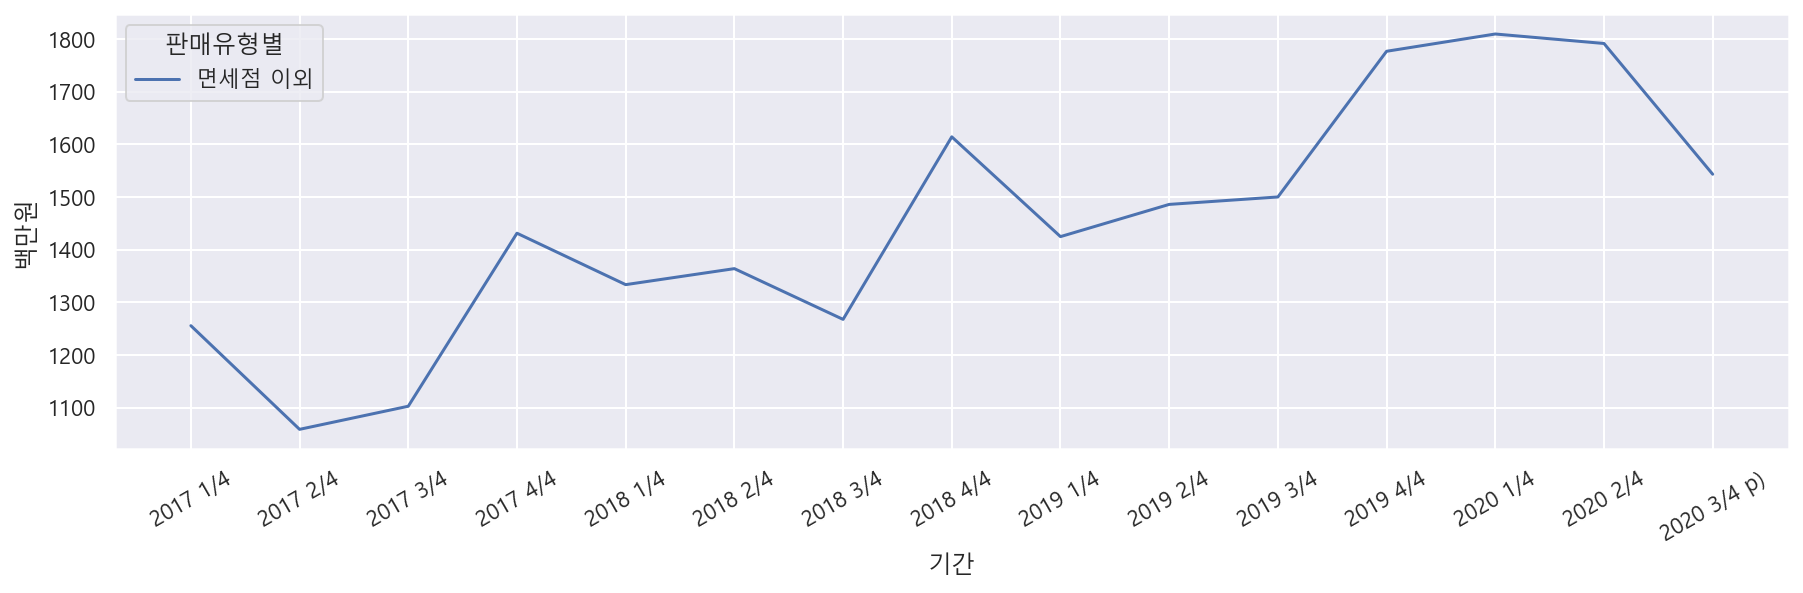

In [55]:
#온라인 면세점도 빼고 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [57]:
#df_fashion이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df["상품군별"]== "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

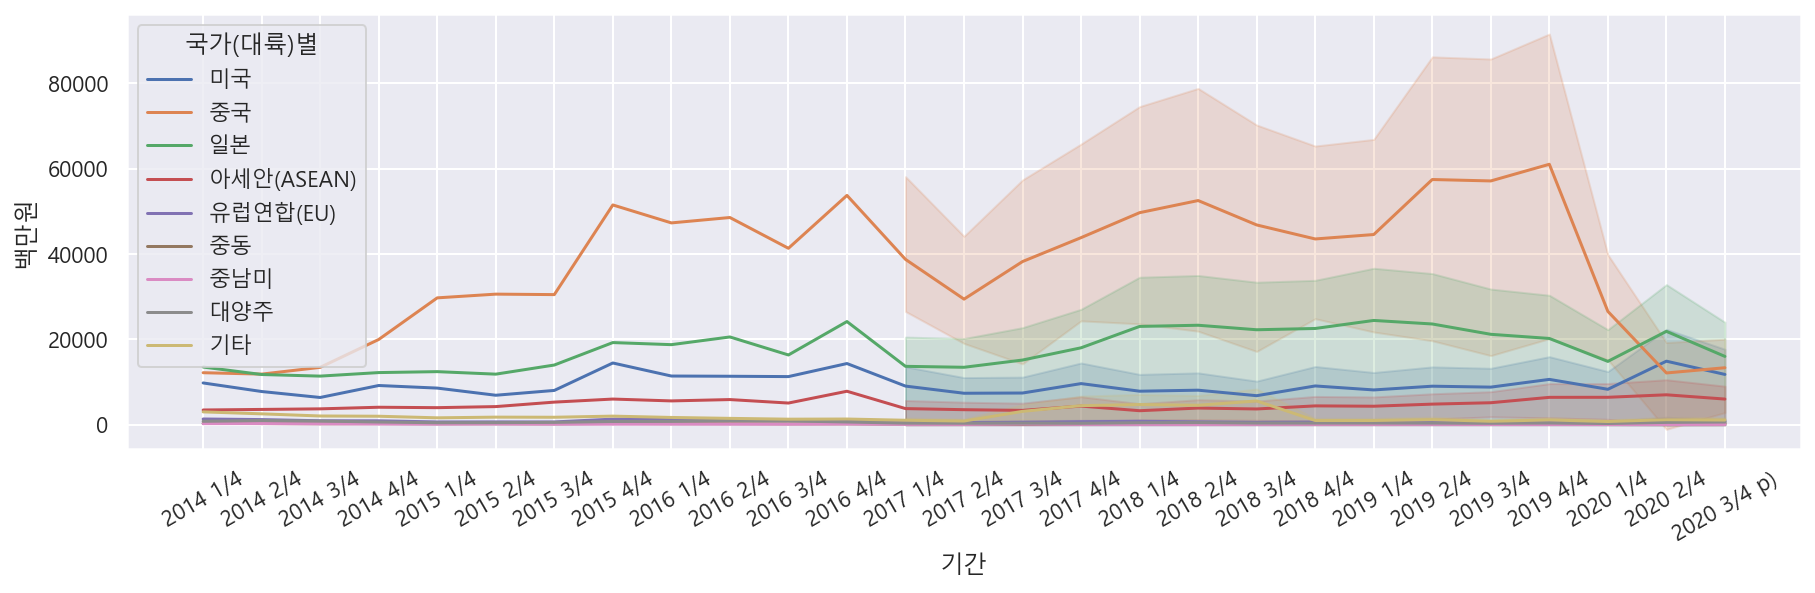

In [60]:
#"의류 및 패션 관련상품"판매액에 대한 기간별 금액 데이터 시각화하고
#"국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

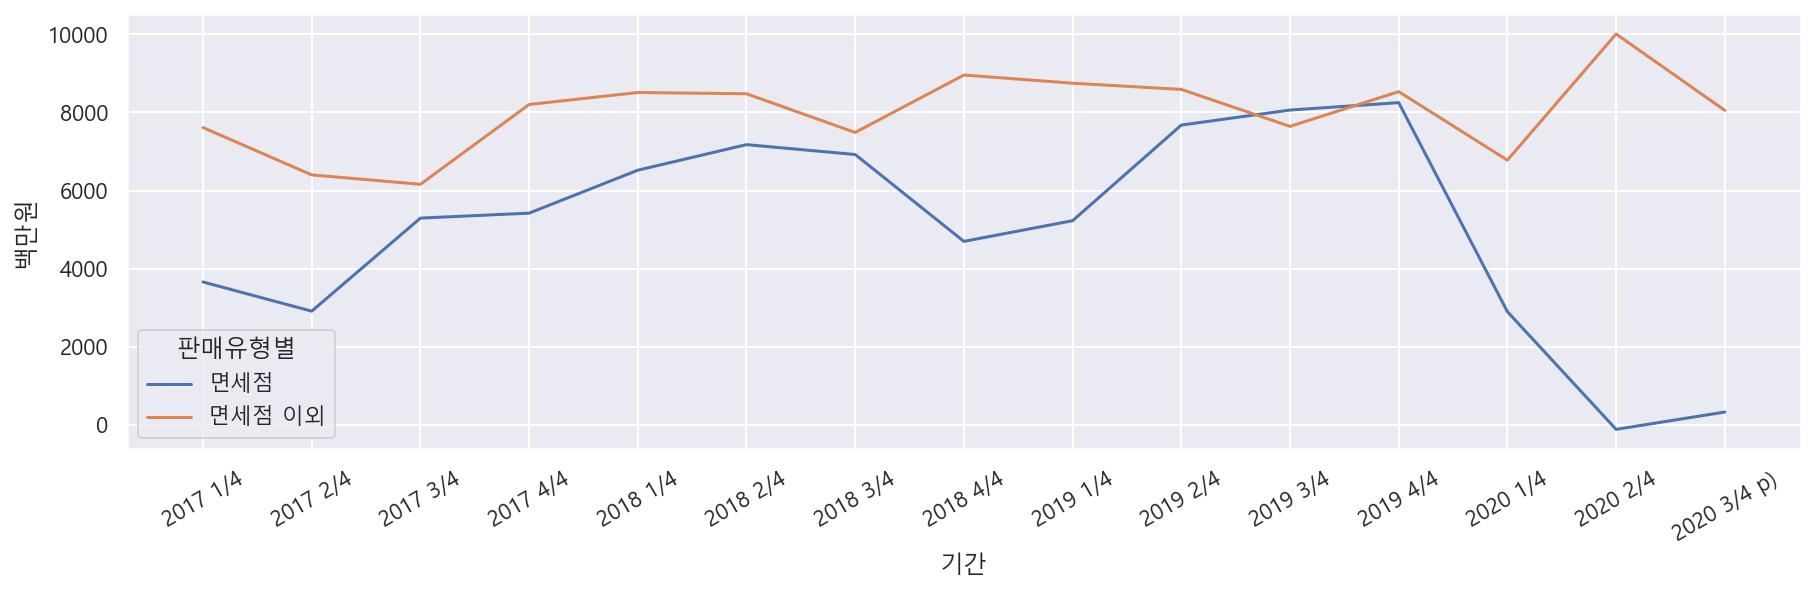

In [62]:
#"의류 및 패션 관련상품"판매액에 대한 기간별 금액 데이터 시각화하고
#"판매유형별"로 다른 색상으로 표시하기
df_fashion2 = df[(df["상품군별"]== "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

### 데이터 집계하기

In [64]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
67,미국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1


In [65]:
#피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기
result = df_fashion.pivot_table(
    index="국가(대륙)별", values="백만원", 
    columns="연도", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
기타,9683.0,7248.0,5918.0,28774.0,47802.0,12618.0,9276.0
대양주,3392.0,2349.0,3401.0,4532.0,5450.0,4774.0,4584.0
미국,33223.0,38066.0,48451.0,100706.0,95750.0,110070.0,105082.0
아세안(ASEAN),14936.0,19639.0,24478.0,45342.0,46136.0,62434.0,58542.0
유럽연합(EU),4485.0,3374.0,4899.0,7472.0,8228.0,7388.0,7644.0
일본,48960.0,57594.0,79905.0,181168.0,273600.0,268486.0,158310.0
중국,57531.0,142339.0,190932.0,450814.0,577696.0,660508.0,156232.0
중남미,975.0,616.0,649.0,1524.0,1152.0,1086.0,722.0
중동,1172.0,1018.0,968.0,1544.0,1758.0,1848.0,2670.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

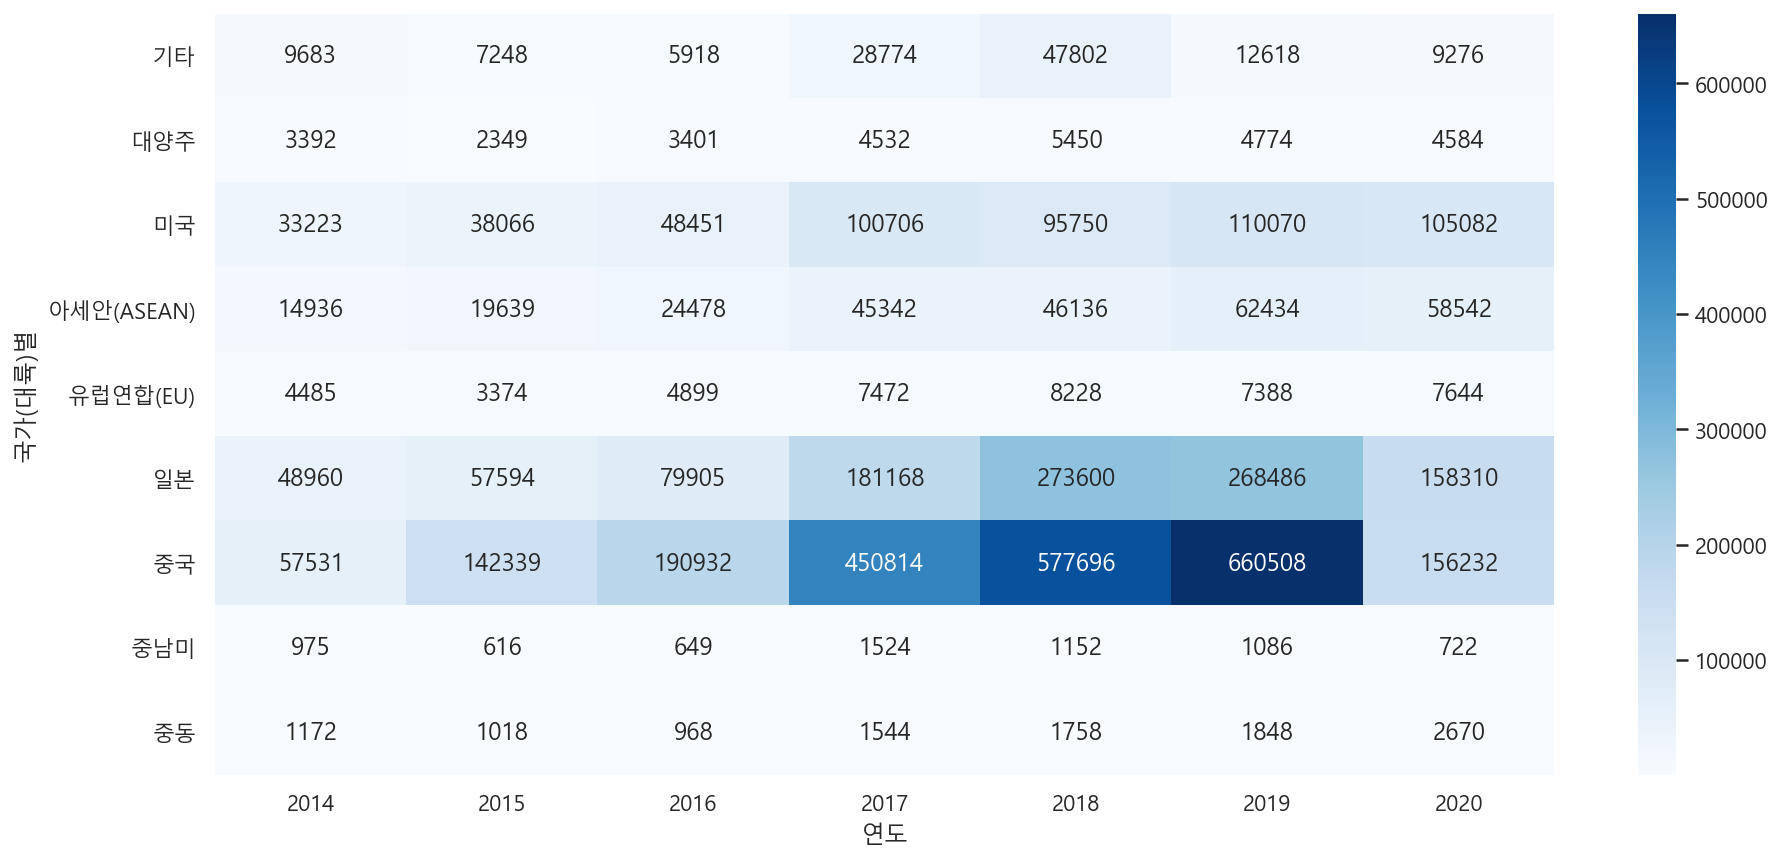

In [66]:
#피폿테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기
plt.figure(figsize=(15, 7))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='백만원'>

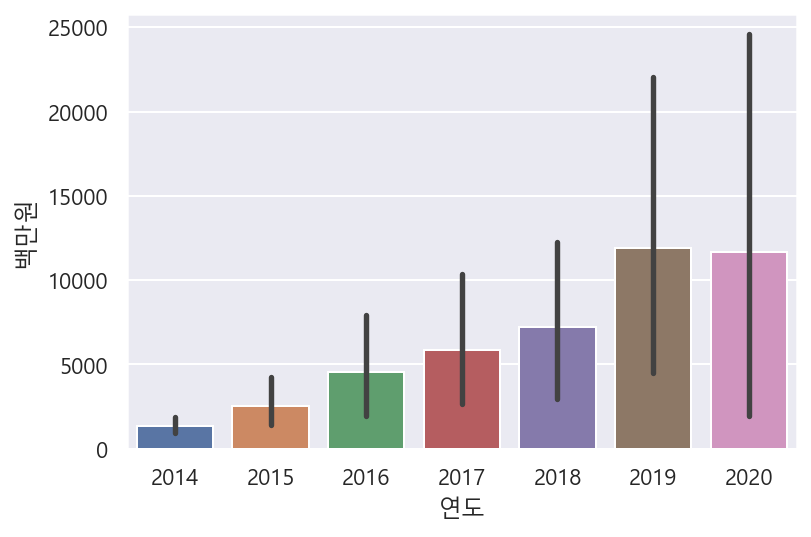

In [68]:
#위에서 판매유형별 데이터의 "계"만 모은 df_total변수를 통한 연도별 합계 금액을 시각화 하기
sns.barplot(data = df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

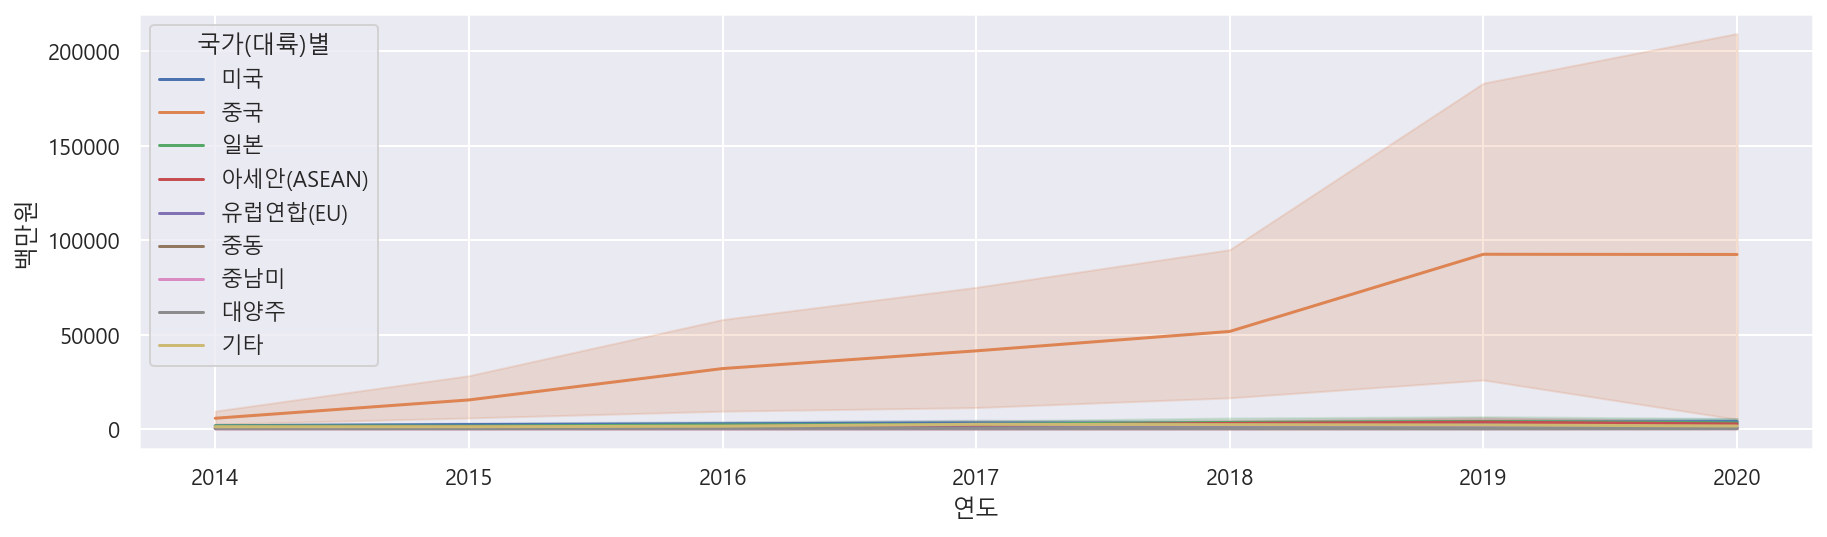

In [70]:
#연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="백만원", data=df_total, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

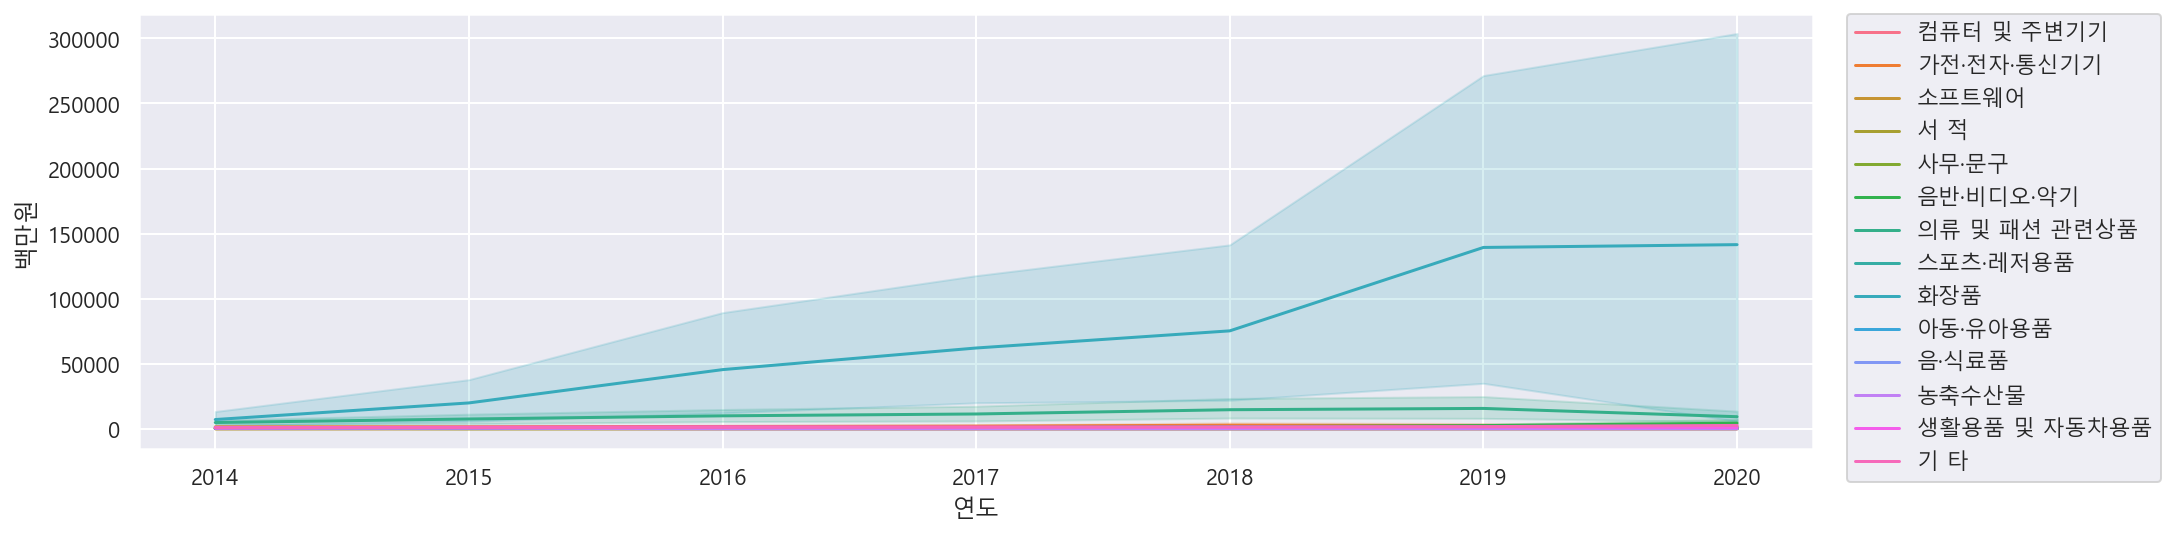

In [74]:

#연도별 판매액으 그리고 "상품권별"로 다른 색상으로 표현하기
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="백만원", data=df_total, hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)